# Here I will emphesize the different frequency components in the signal and how the LFP and AP signal differ

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, freqz, lfilter, filtfilt
import warnings
warnings.simplefilter("ignore")

s = np.load('../test_data_sintef.npy') # 48kHz (Dataset 1)
#s = np.load('../52728_2021-09-25_01_24KHz_test_data_sintef.npy') # 24kHz (Dataset 2)
#s = np.load('../56180_2021-11-05_06_24KHz_test_data_sintef.npy') # 24kHz (Dataset 3)
#s = np.load('../61467_2022-09-16_01_48KHz_test_data_sintef.npy') # 48kHz (Dataset 4)

## Visualize

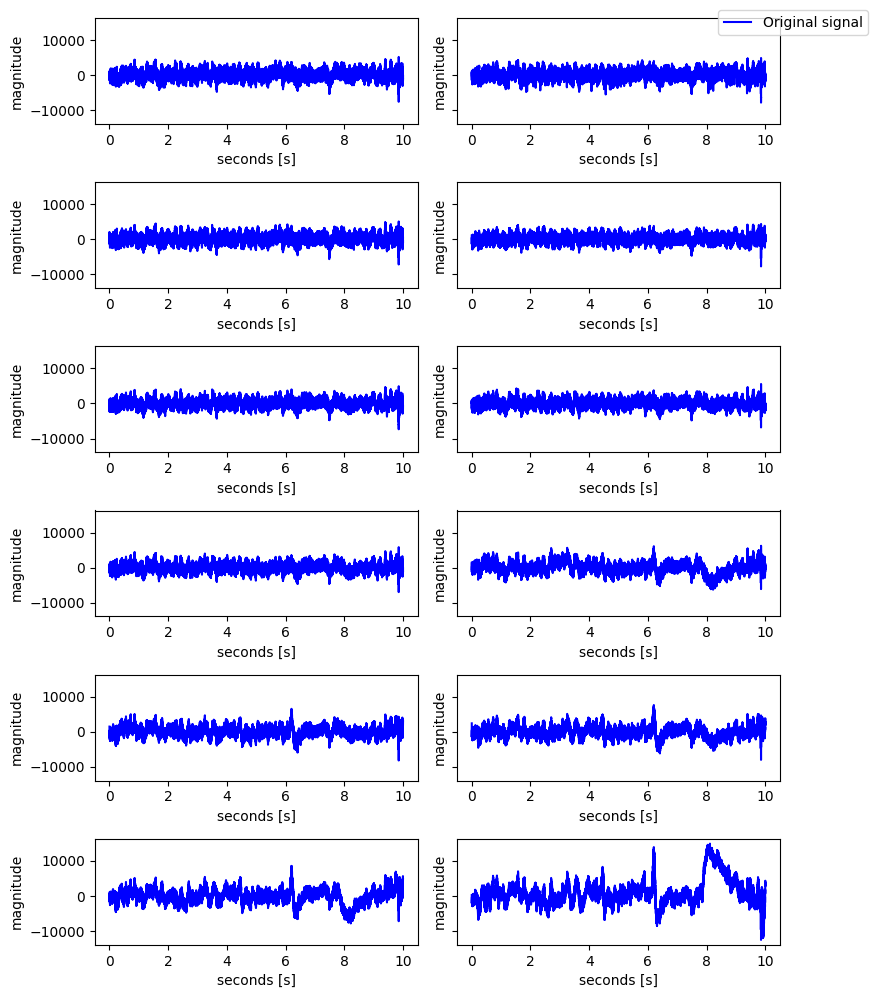

In [24]:
# Visualize the signals
ts = np.linspace(0,10, int(s.shape[0])) # time 

# Visualize the whole signals with 3 bits less
fig, axs = plt.subplots(6, 2, figsize=(8, 10), sharey=True)
for i in range(s.shape[1] - 4):
    axs.flatten()[i].plot(ts, s[:,i], 'b')
    axs.flatten()[i].set_xlabel('seconds [s]')
    axs.flatten()[i].set_ylabel('magnitude')
fig.legend(['Original signal'], loc='upper right', bbox_to_anchor=(1.1, 1))
plt.tight_layout() 
plt.show()

Text(0.5, 1.0, 'Emphasize LFP signal by looking at section of tetrode signal')

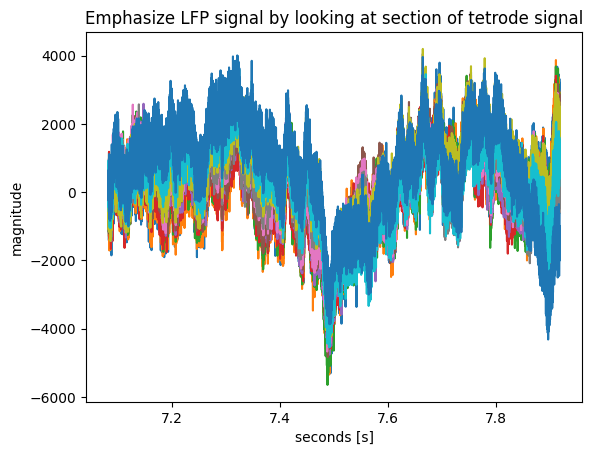

In [25]:
# Emphasize the LFP signals (the oscillation seen in several channels)
plt.plot(ts[340000:380000], s[340000:380000,:11])
plt.xlabel('seconds [s]')
plt.ylabel('magnitude')
plt.title('Emphasize LFP signal by looking at section of tetrode signal')

Text(0.5, 1.0, 'Emphasize EAP signals (the spikes)')

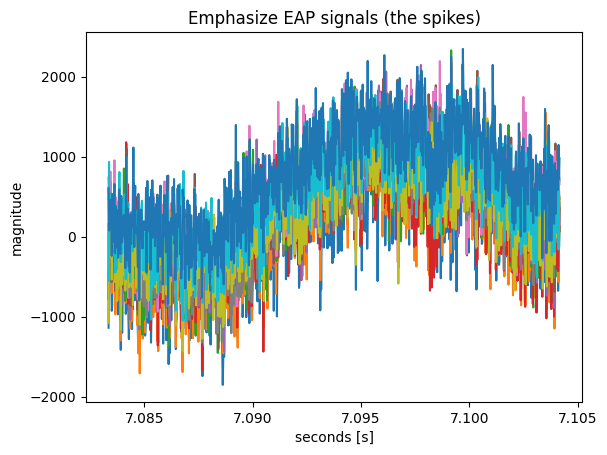

In [26]:
# Emphasize the EAPsignals (the spikes)
plt.plot(ts[340000:341000], s[340000:341000,:11])
plt.xlabel('seconds [s]')
plt.ylabel('magnitude')
plt.title('Emphasize EAP signals (the spikes)')

## Filter

### Visualize the Digital Butterworth lowpass and highpass filters used

Two of the digital filters are used to replicate the internal analog filters in the INTAN chip 

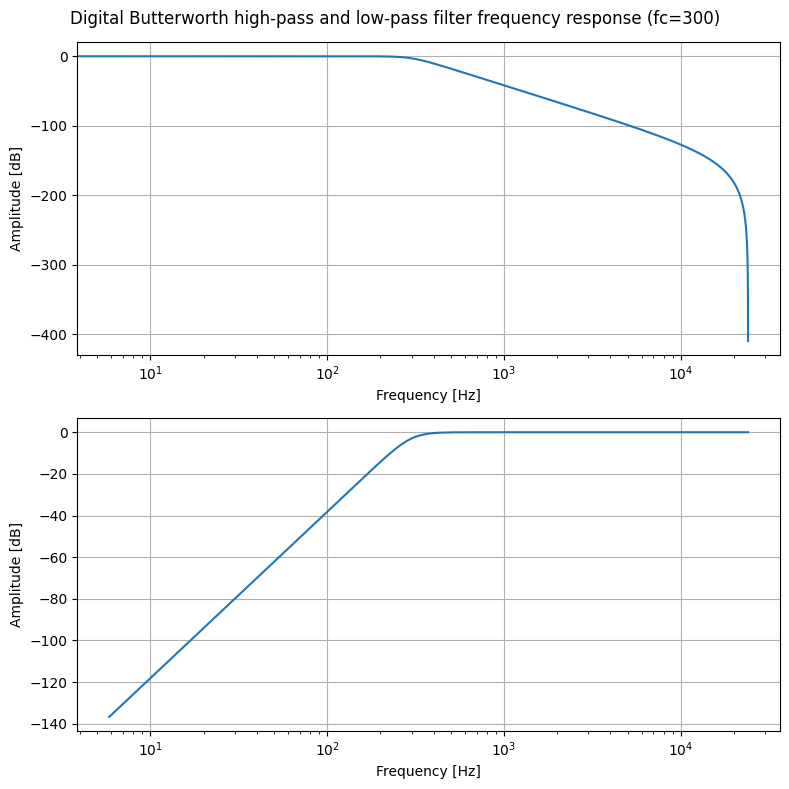

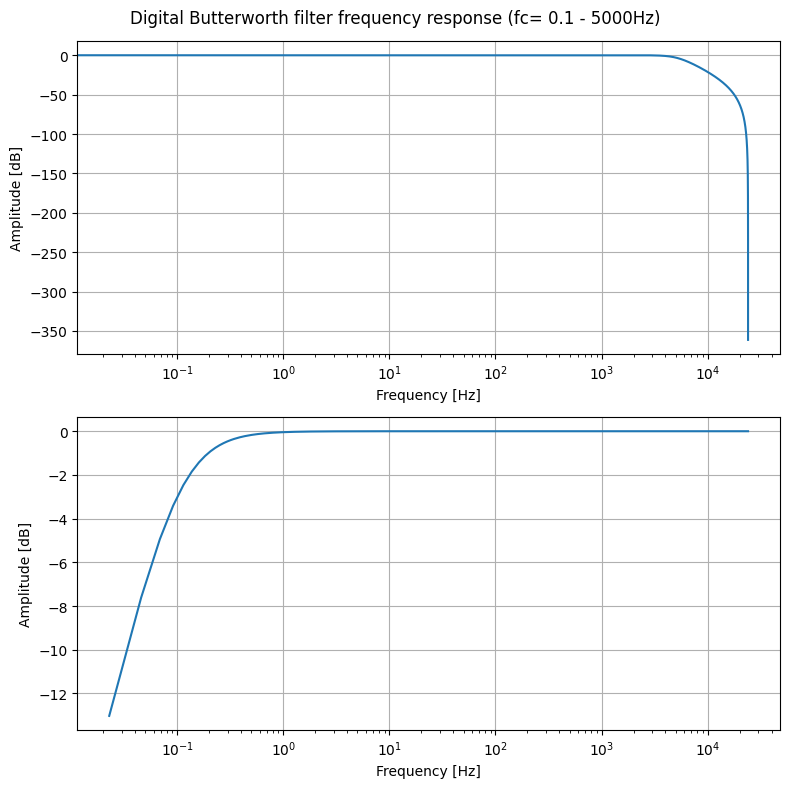

In [27]:
# Digital Low pass and high pass filters
fs = 48000
fc = 300
Wn = fc / (fs/2)
b, a = butter(N=4, Wn=Wn, btype='low', analog=False, output='ba')
b2, a2 = butter(N=4, Wn=Wn, btype='high', analog=False, output='ba')

# compute the frequency response
w, h = freqz(b, a, 2**12)
f = w/(2*np.pi) *fs
w2, h2 = freqz(b2, a2, 2**12)
f2 = w2/(2*np.pi) *fs

# plot the magnitude response
fig, axs = plt.subplots(2,1,figsize=(8,8))
axs[0].semilogx(f, 20 * np.log10(abs(h)))
axs[1].semilogx(f2, 20 * np.log10(abs(h2)))
axs[0].set_xlabel('Frequency [Hz]')
axs[0].set_ylabel('Amplitude [dB]')
axs[1].set_xlabel('Frequency [Hz]')
axs[1].set_ylabel('Amplitude [dB]')
axs[0].grid(True) 
axs[1].grid(True) 
fig.suptitle('Digital Butterworth high-pass and low-pass filter frequency response (fc=300)')
plt.tight_layout()
plt.show()


#----


# Digital Low pass and high pass filters
fs = 48000
fc1 = 5000
fc2 = 0.1
Wn1 = fc1 / (fs/2)
Wn2 = fc2 / (fs/2)
b3, a3 = butter(N=3, Wn=Wn1, btype='low', analog=False, output='ba')
b4, a4 = butter(N=1, Wn=Wn2, btype='high', analog=False, output='ba')

# compute the frequency response
w3, h3 = freqz(b3, a3, 2**20)
f3 = w3/(2*np.pi) *fs
w4, h4 = freqz(b4, a4, 2**20)
f4 = w4/(2*np.pi) *fs

# plot the magnitude response
fig, axs = plt.subplots(2,1, figsize=(8,8))
axs[0].semilogx(f3, 20 * np.log10(abs(h3)))
axs[1].semilogx(f4, 20 * np.log10(abs(h4)))
axs[0].set_xlabel('Frequency [Hz]')
axs[0].set_ylabel('Amplitude [dB]')
axs[1].set_xlabel('Frequency [Hz]')
axs[1].set_ylabel('Amplitude [dB]')
axs[0].grid(True) 
axs[1].grid(True) 
fig.suptitle('Digital Butterworth filter frequency response (fc= 0.1 - 5000Hz)')
plt.tight_layout()
plt.show()


### Filter the signal

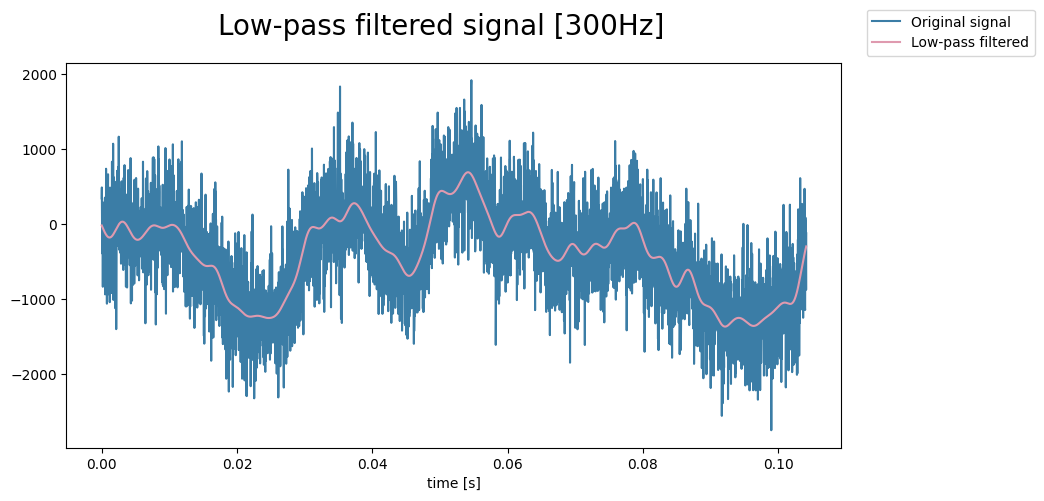

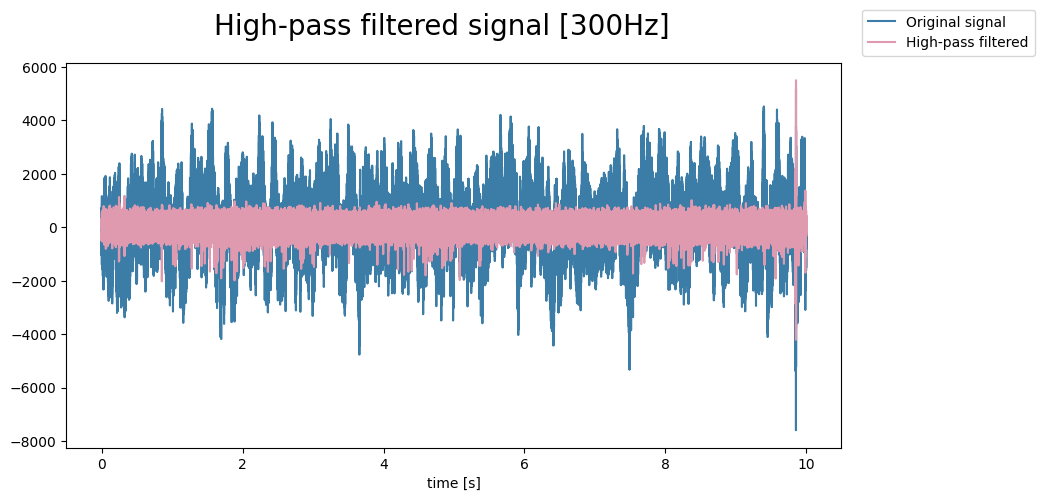

In [28]:
x = s[:,:]
j = 0 # channel we plot
time = 10*x.shape[0]/s.shape[0]
tx = np.linspace(0,time, int(x.shape[0])) # time 


#first band pass filter the signal (using what resembles the analog filters in the INTAN chip)
lp = np.zeros_like(x)
bp = np.zeros_like(x)
AP= np.zeros_like(x)
LFP = np.zeros_like(x)
for i in range(x.shape[1]):
    lp[:,i] = lfilter(b3,a3, x[:,i])
    bp[:,i] = lfilter(b4,a4,lp[:,i])

    AP[:,i] = filtfilt(b2,a2, bp[:,i])
    LFP[:,i] = filtfilt(b,a,  bp[:,i])


# Illustrate the LFP components of the signal
fig = plt.figure(figsize=(10, 5))
plt.plot(tx[:5000],   x[:5000,j], color='#3B7DA6')
plt.plot(tx[:5000], LFP[:5000,j], color='#DF9AAF')
plt.xlabel('time [s]')
#plt.tight_layout()
fig.suptitle('Low-pass filtered signal [300Hz]', fontsize=20)
fig.legend(['Original signal', 'Low-pass filtered'], loc='upper right', bbox_to_anchor=(1.1, 1))


# Illustrate the EAPcomponents of the signal
fig = plt.figure( figsize=(10, 5))
plt.plot(tx[:],  x[:,j], color='#3B7DA6')
plt.plot(tx[:], AP[:,j], color='#DF9AAF')
plt.xlabel('time [s]')
#axs[1].set_ylabel('magnitude')
#plt.tight_layout()
fig.suptitle('High-pass filtered signal [300Hz]', fontsize=20)
fig.legend(['Original signal', 'High-pass filtered'], loc='upper right', bbox_to_anchor=(1.1, 1))

Text(0.5, 0.98, 'Digital Butterworth High passed signal [300Hz]')

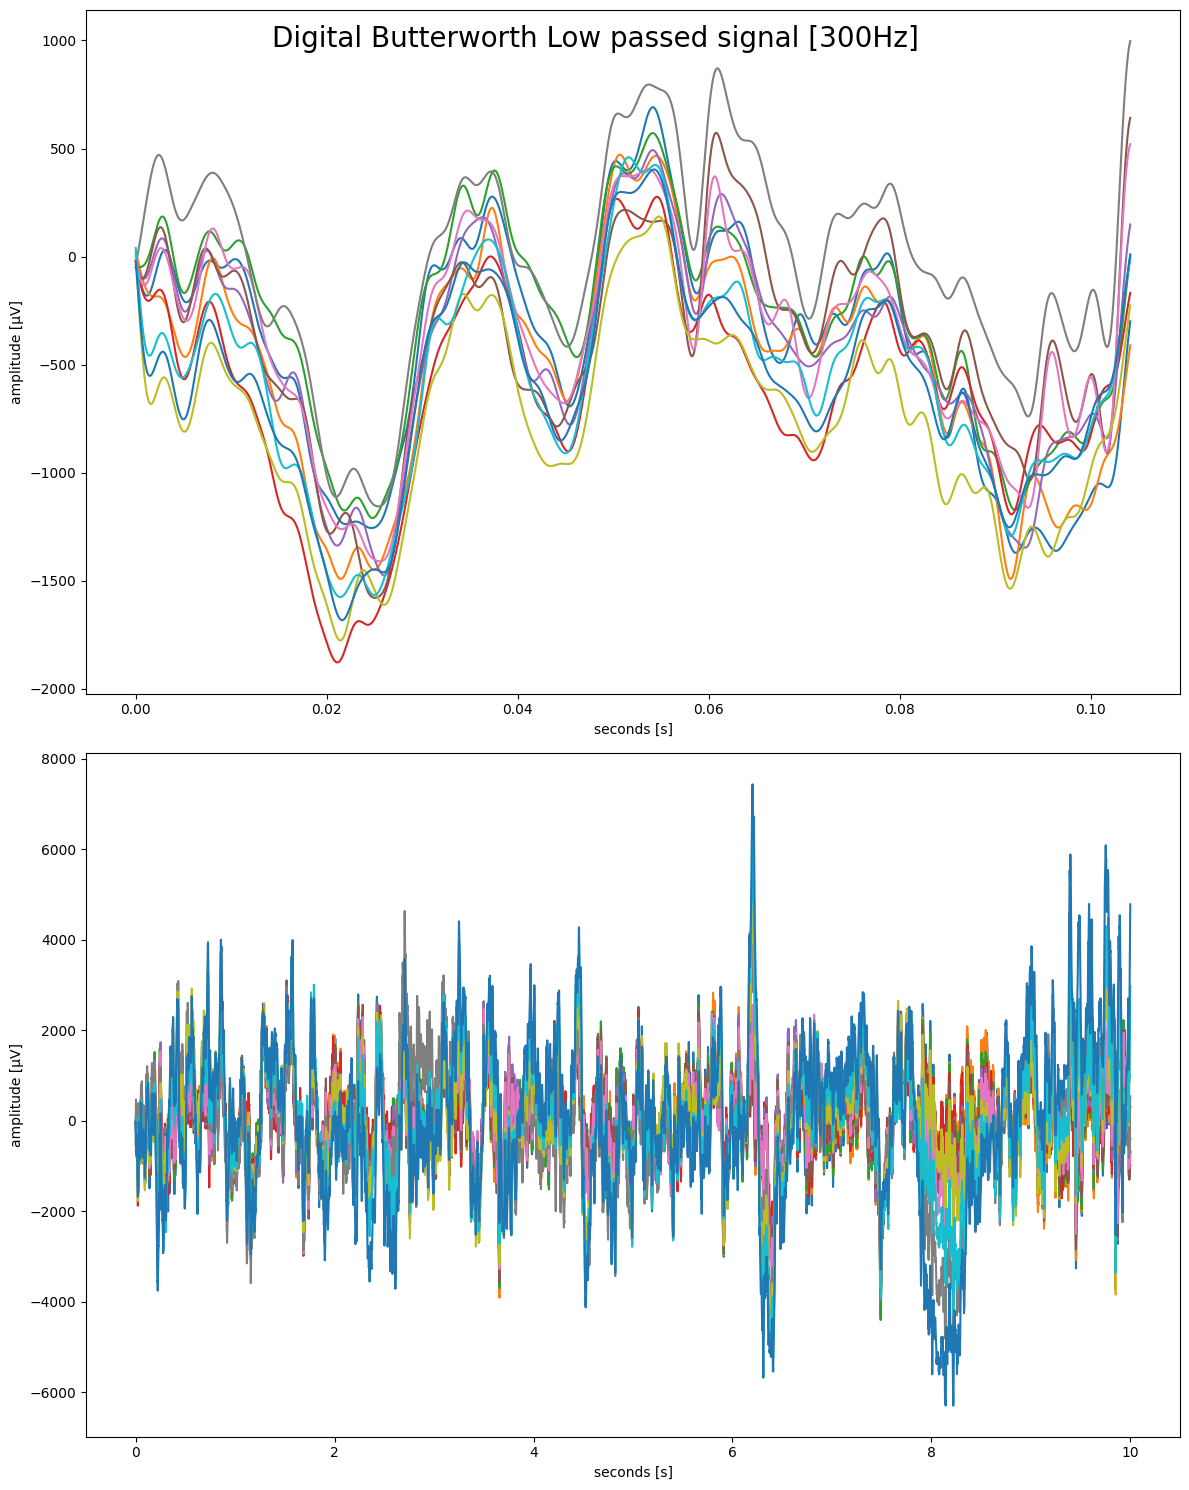

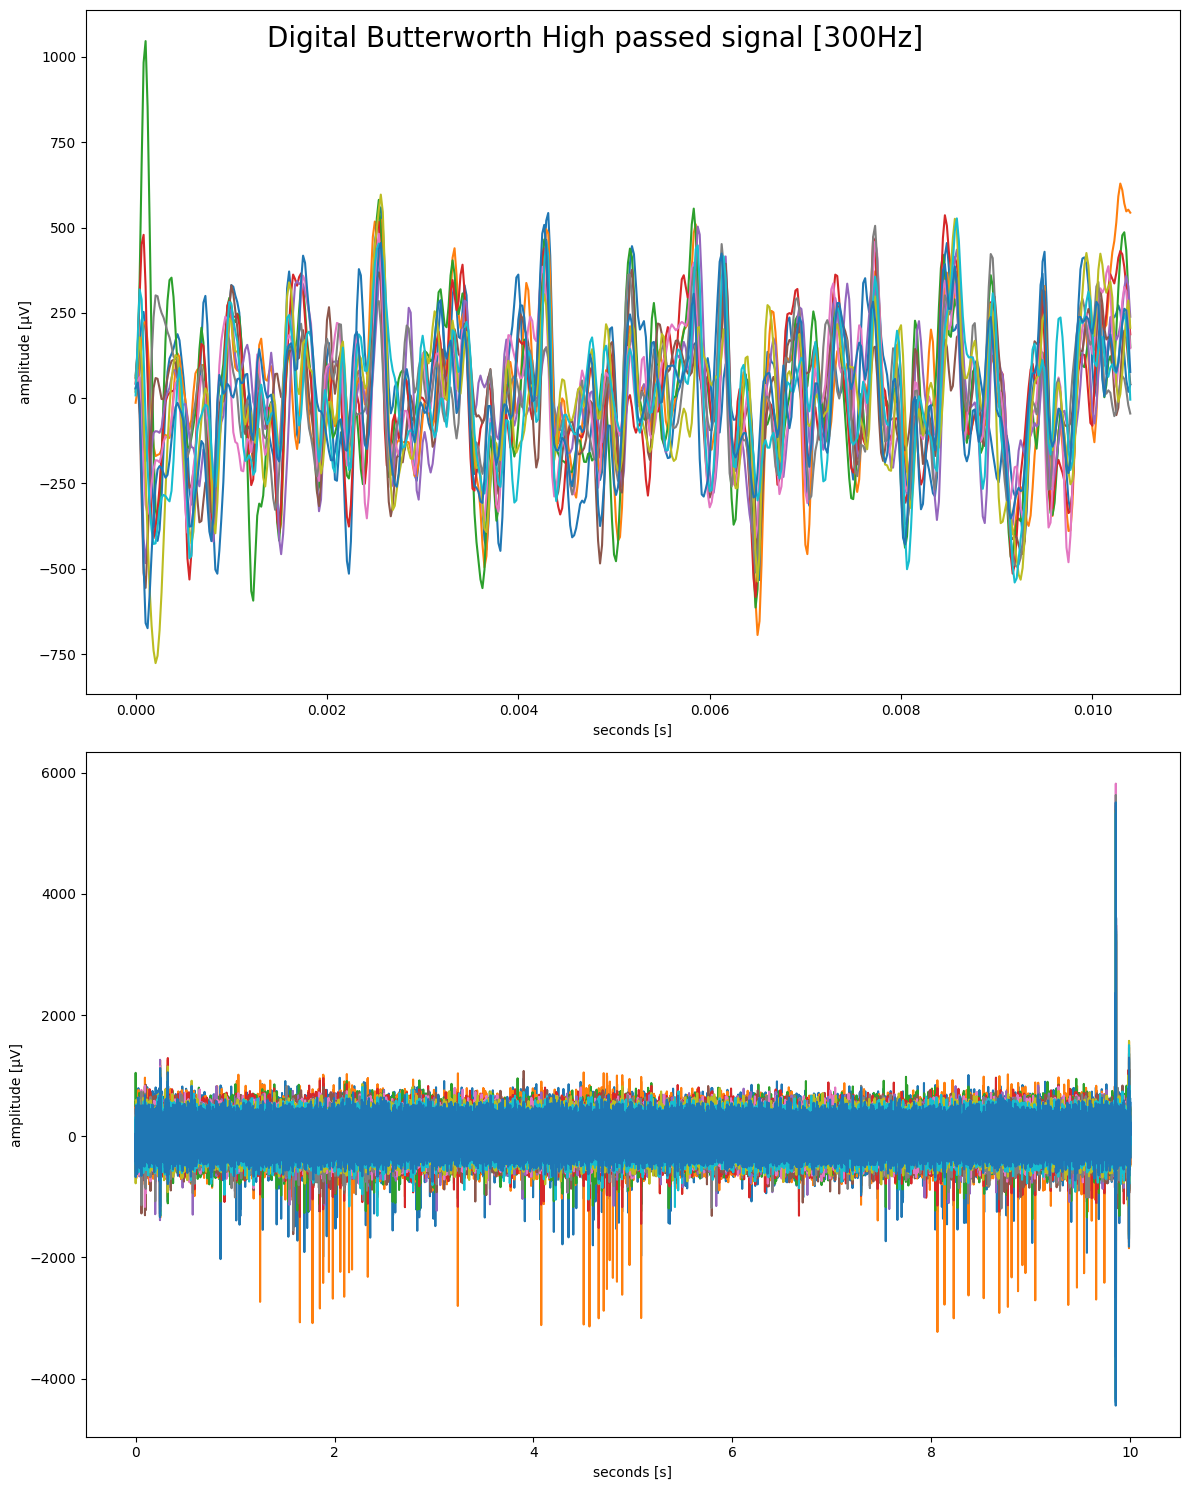

In [29]:
# illustrate the effects on all tetrode channels

# Illustrate the LFP components of the signal
fig, axs = plt.subplots(2,1, figsize=(12, 15))
axs[0].plot(tx[:5000], LFP[:5000,:11])
axs[0].set_xlabel('seconds [s]')
axs[0].set_ylabel('amplitude [µV]')
axs[1].plot(tx[:], LFP[:,:11])
axs[1].set_xlabel('seconds [s]')
axs[1].set_ylabel('amplitude [µV]')
plt.tight_layout()
fig.suptitle('Digital Butterworth Low passed signal [300Hz]', fontsize=20)


# Illustrate the AP components of the signal
fig, axs = plt.subplots(2,1, figsize=(12, 15))
axs[0].plot(tx[:500], AP[:500,:11])
axs[0].set_xlabel('seconds [s]')
axs[0].set_ylabel('amplitude [µV]')
axs[1].plot(tx[:], AP[:,:11])
axs[1].set_xlabel('seconds [s]')
axs[1].set_ylabel('amplitude [µV]')
plt.tight_layout()
fig.suptitle('Digital Butterworth High passed signal [300Hz]', fontsize=20)

We can see how there is a clear shared shape for the LFP signals of the different channels, but that the AP signals differes more from one channel to another

## Frequency components: 

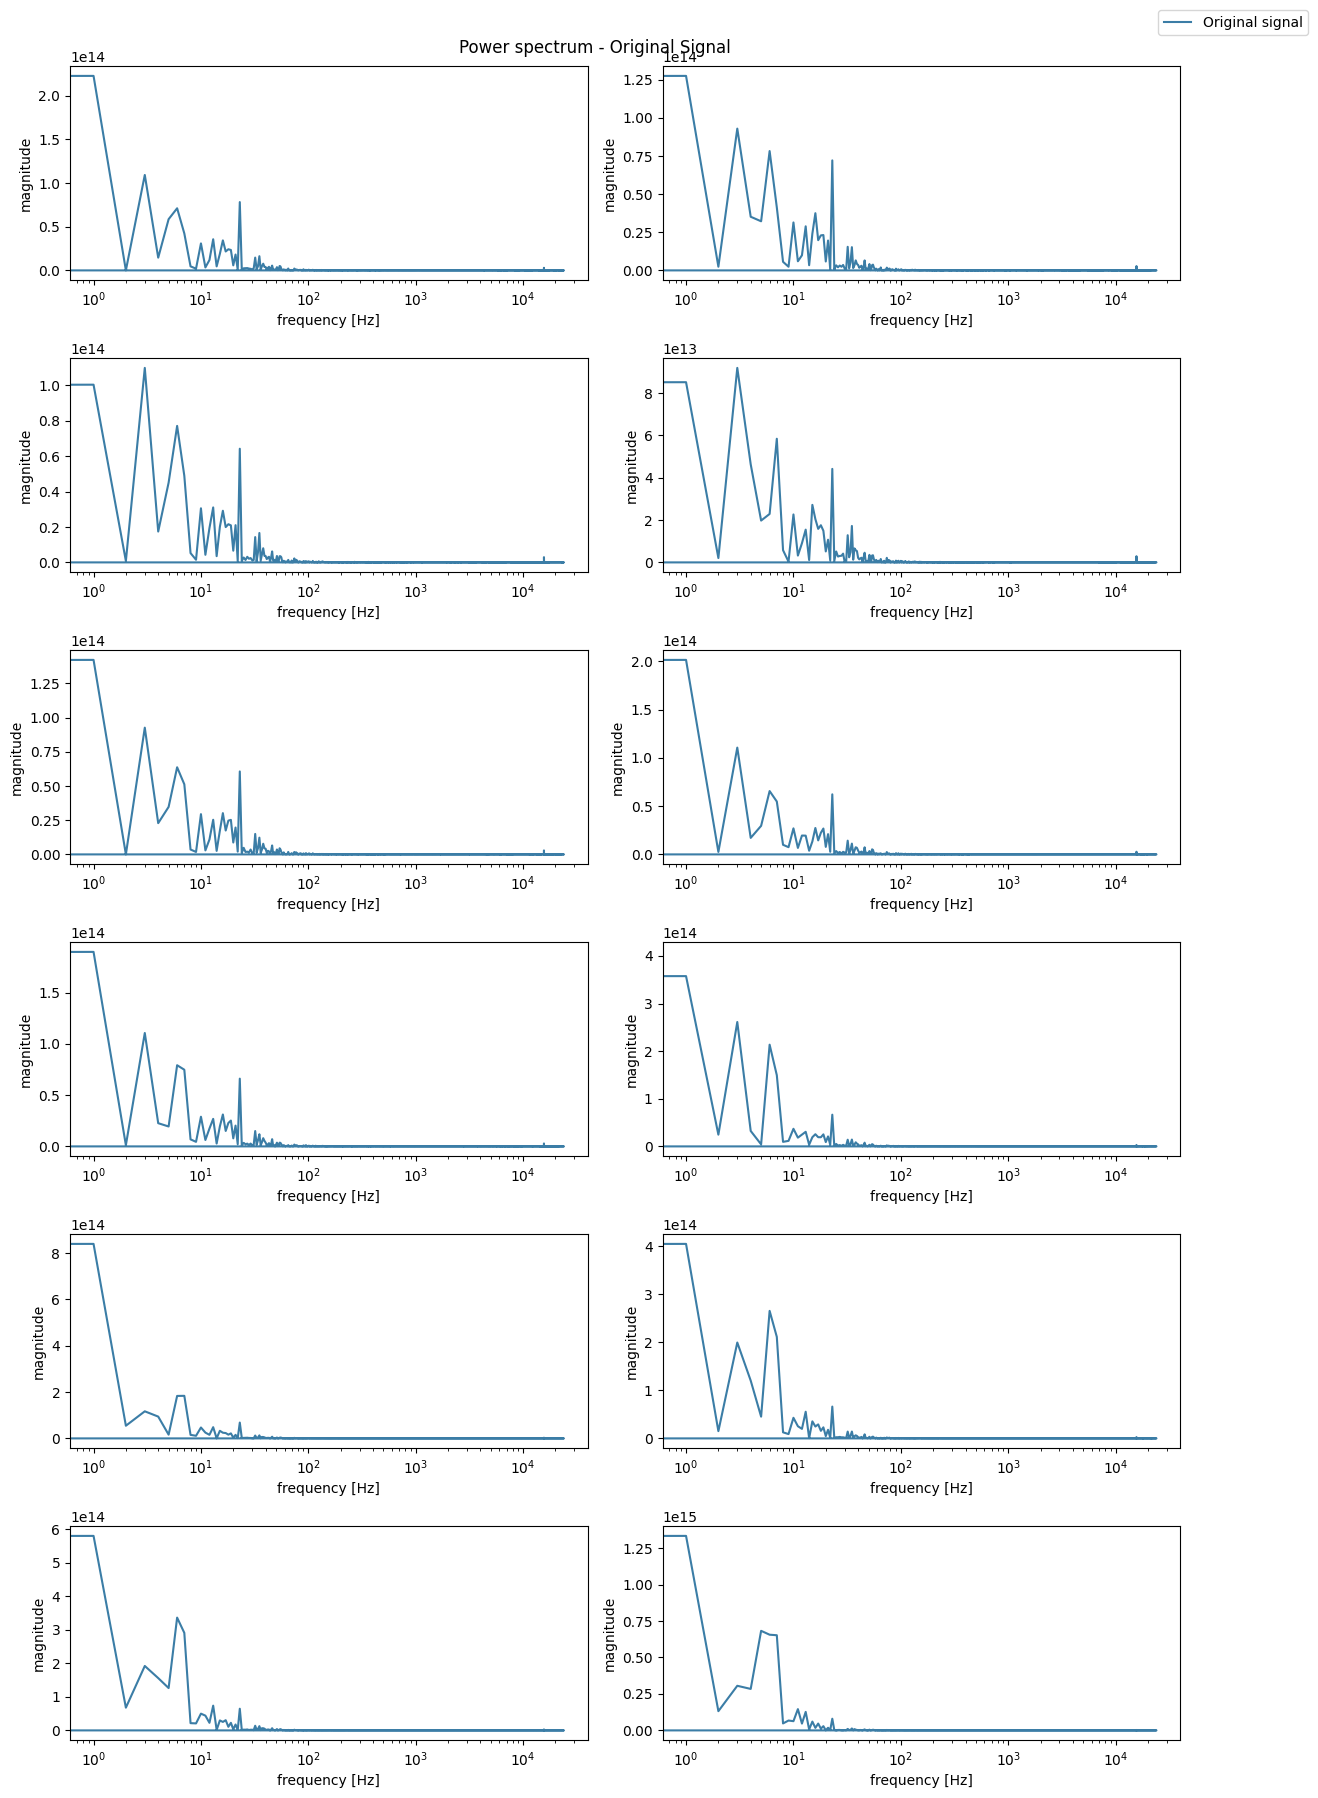

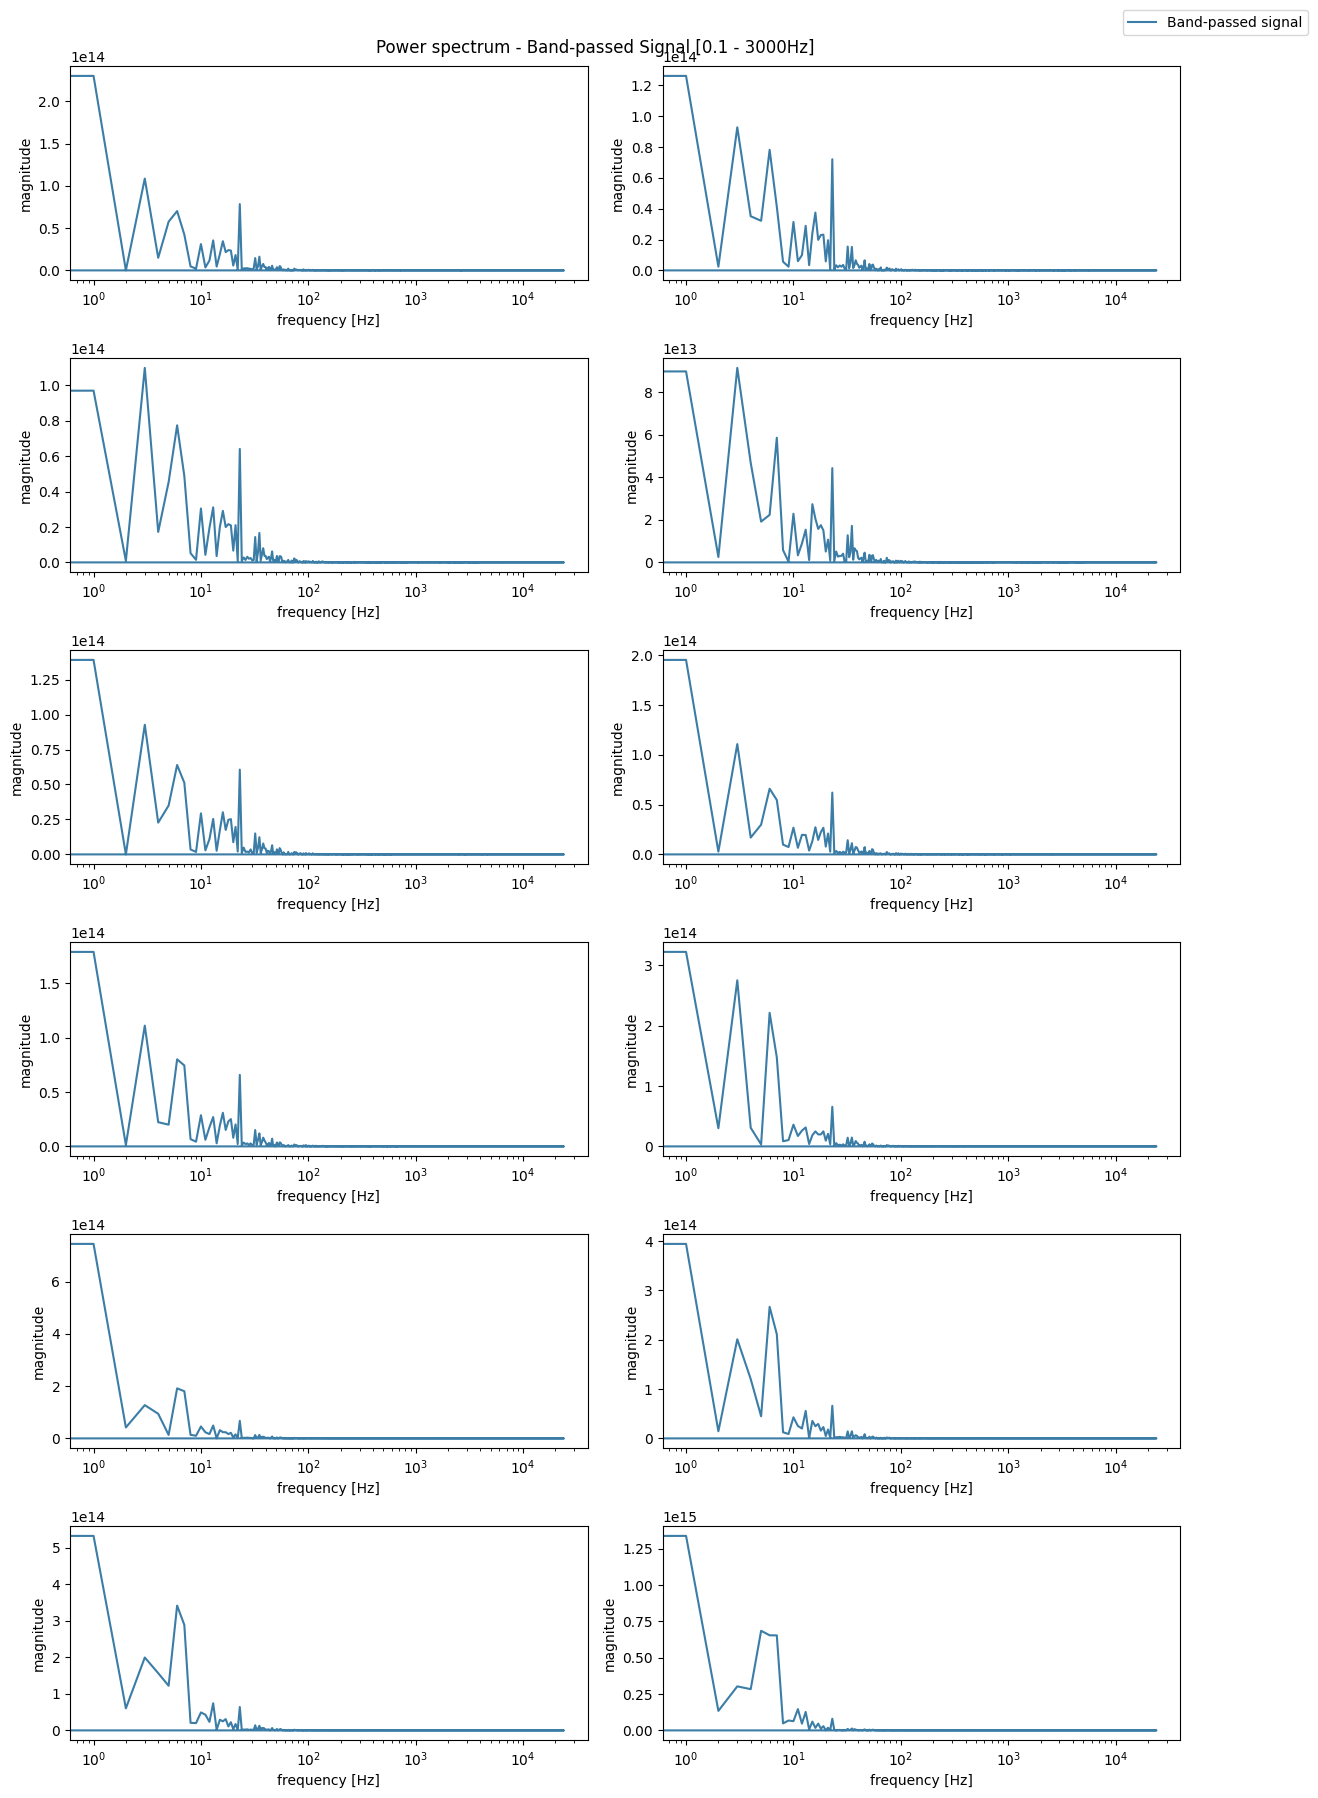

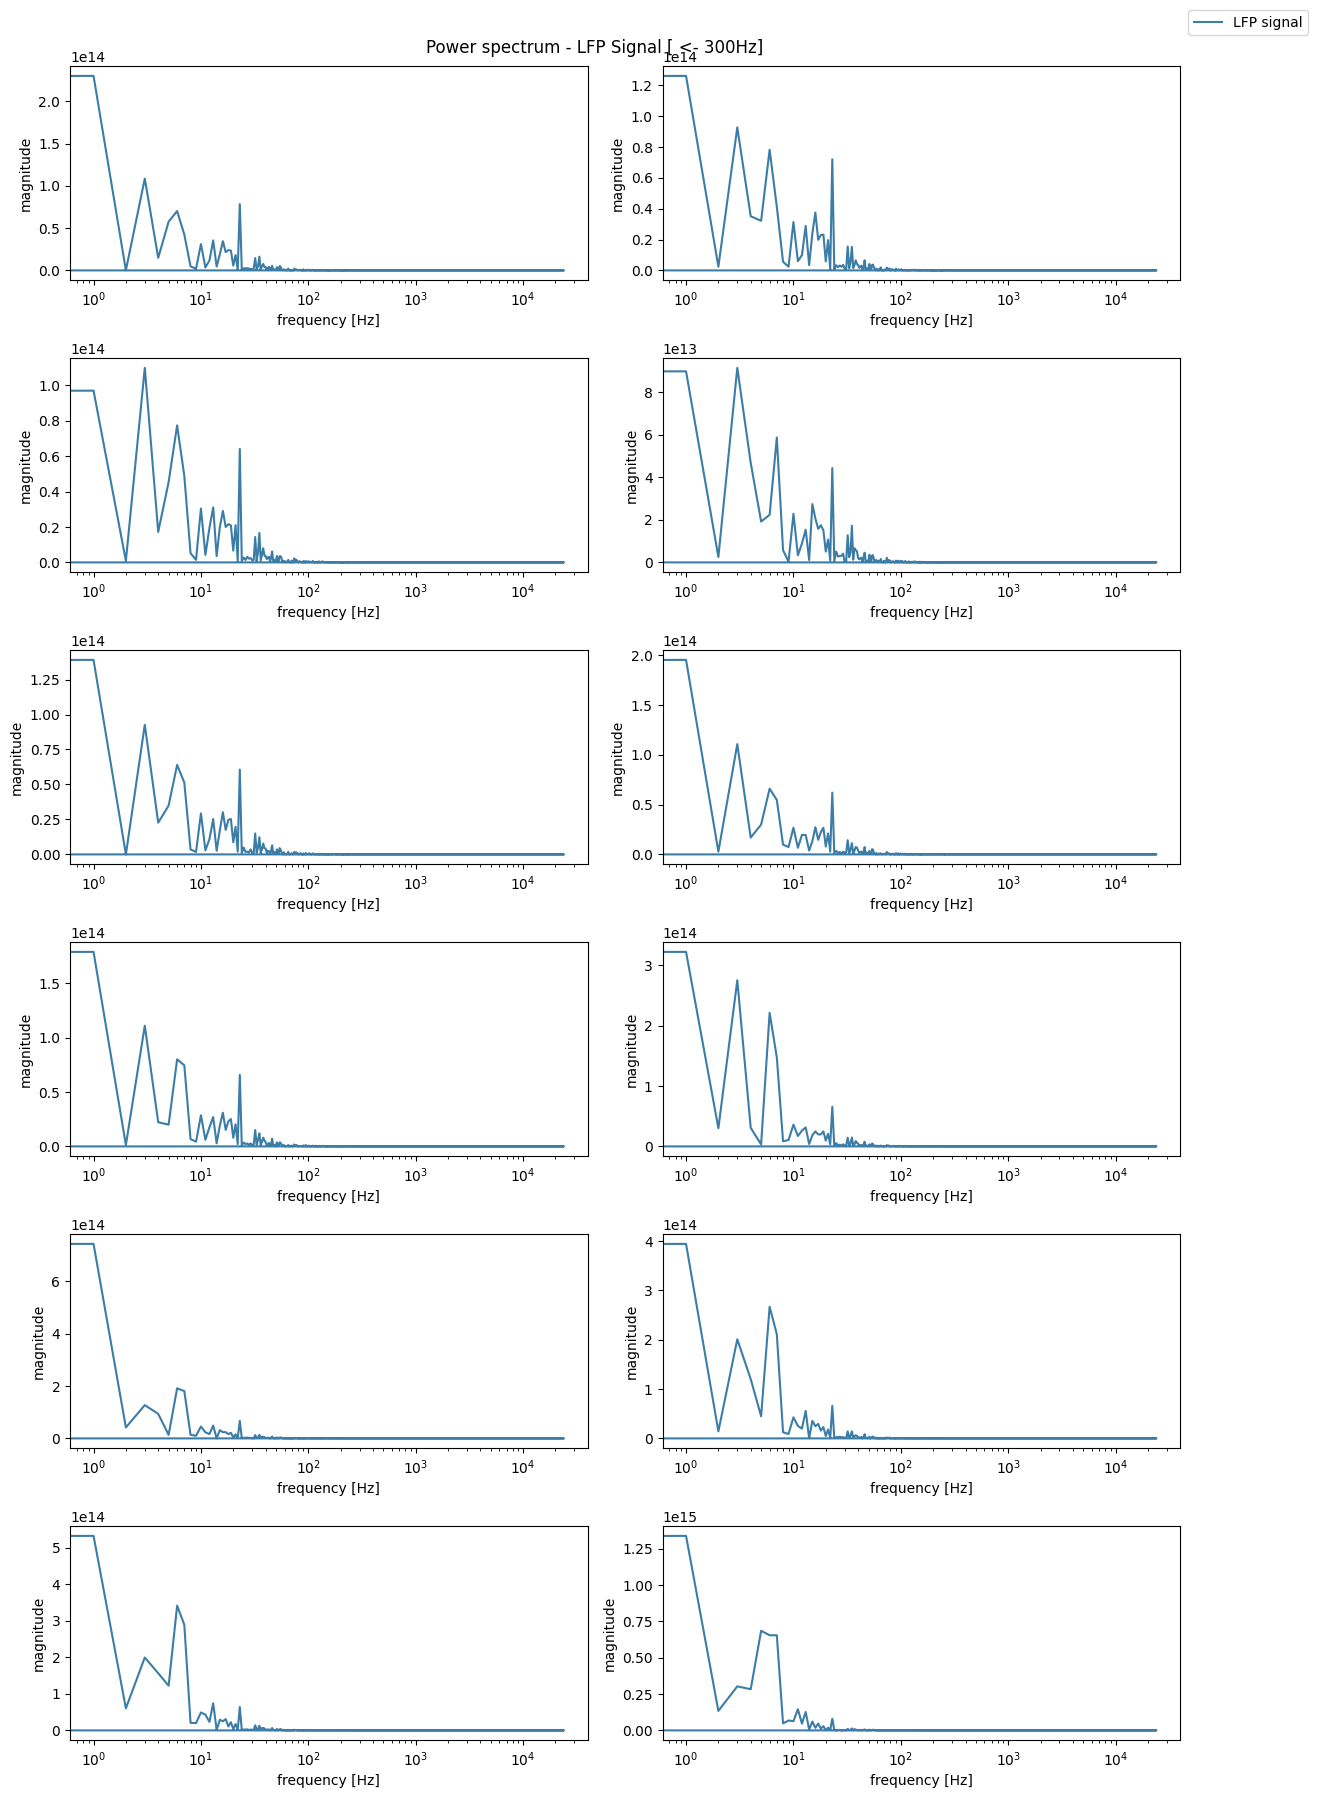

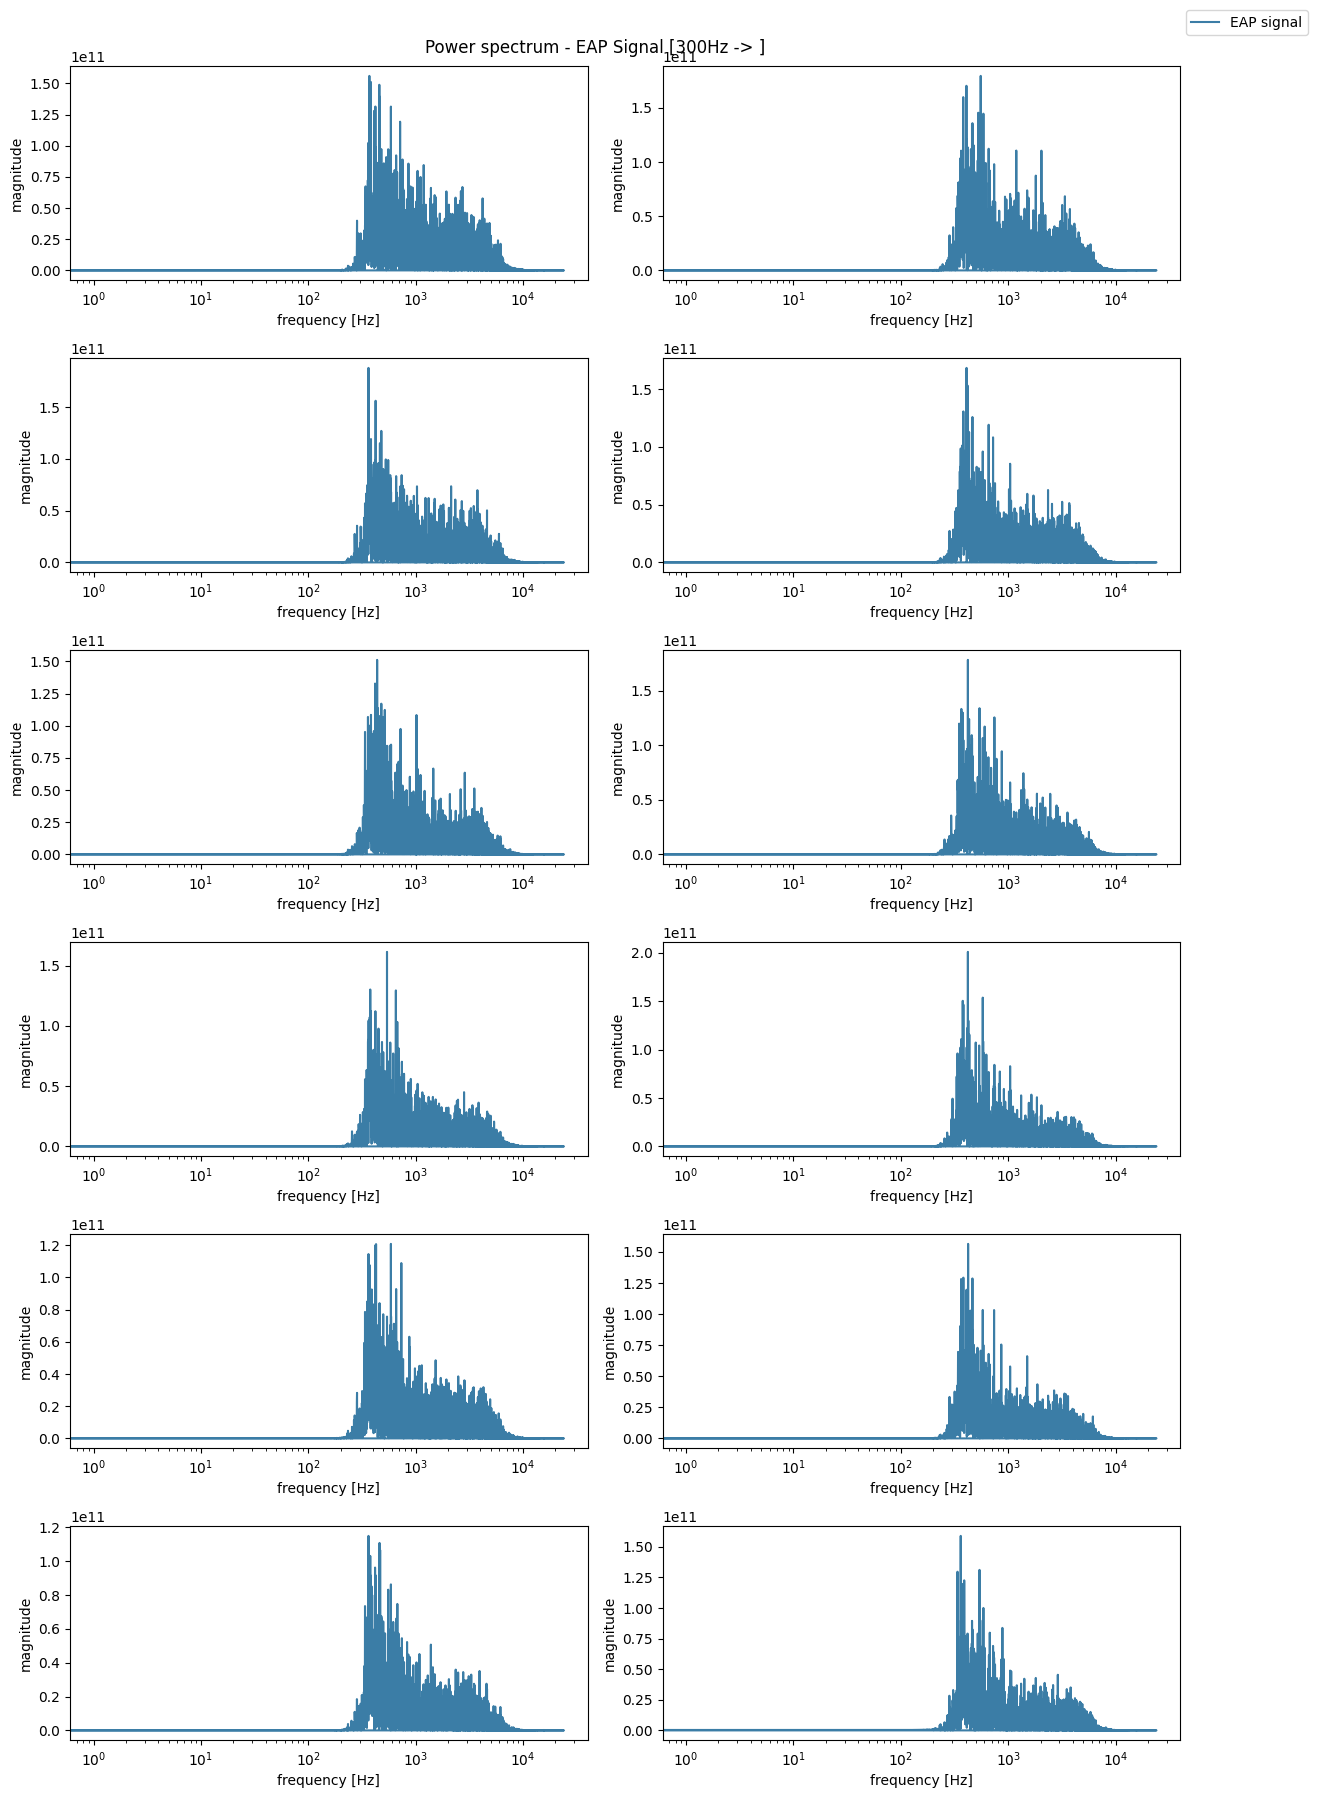

In [30]:
t = np.linspace(0,1,48000) # use one second

fig1, axs1 = plt.subplots(6, 2, figsize=(12, 18))
fig2, axs2 = plt.subplots(6, 2, figsize=(12, 18))
fig3, axs3 = plt.subplots(6, 2, figsize=(12, 18))
fig4, axs4 = plt.subplots(6, 2, figsize=(12, 18))
for i in range(s.shape[1] - 4 ):
    fft_s = np.fft.fft(s[:48000,i])
    P_s = np.abs(fft_s) ** 2
    freqss = np.fft.fftfreq(len(s[:48000,i]), t[1] - t[0])
    fft_bp = np.fft.fft(bp[:48000,i])
    P_bp = np.abs(fft_bp) ** 2
    fft_LFP = np.fft.fft(LFP[:48000,i])
    P_LFP = np.abs(fft_LFP) ** 2
    fft_AP= np.fft.fft(AP[:48000,i])
    P_AP= np.abs(fft_AP) ** 2

    #axs1.flatten()[i].plot(freqss[:], 20*np.log10(P[:]), 'b')
    axs1.flatten()[i].semilogx(freqss[:], P_s[:], color='#3B7DA6')
    axs1.flatten()[i].set_xlabel('frequency [Hz]')
    axs1.flatten()[i].set_ylabel('magnitude')

    axs2.flatten()[i].semilogx(freqss[:], P_bp[:], color='#3B7DA6')
    axs2.flatten()[i].set_xlabel('frequency [Hz]')
    axs2.flatten()[i].set_ylabel('magnitude')

    axs3.flatten()[i].semilogx(freqss[:], P_LFP[:], color='#3B7DA6')
    axs3.flatten()[i].set_xlabel('frequency [Hz]')
    axs3.flatten()[i].set_ylabel('magnitude')

    axs4.flatten()[i].semilogx(freqss[:], P_AP[:], color='#3B7DA6')
    axs4.flatten()[i].set_xlabel('frequency [Hz]')
    axs4.flatten()[i].set_ylabel('magnitude')

fig1.suptitle('Power spectrum - Original Signal')
fig2.suptitle('Power spectrum - Band-passed Signal [0.1 - 3000Hz]')
fig3.suptitle('Power spectrum - LFP Signal [ <- 300Hz]')
fig4.suptitle('Power spectrum - EAP Signal [300Hz -> ]')
fig1.tight_layout()
fig2.tight_layout()
fig3.tight_layout()
fig4.tight_layout()
fig1.legend(['Original signal'], loc='upper right', bbox_to_anchor=(1.1, 1))
fig2.legend(['Band-passed signal'], loc='upper right', bbox_to_anchor=(1.1, 1))
fig3.legend(['LFP signal'], loc='upper right', bbox_to_anchor=(1.1, 1))
fig4.legend(['EAP signal'], loc='upper right', bbox_to_anchor=(1.1, 1))

Notice the 10kHz noise that is present in the orignal signal is supressed after band pass filtering. Furthermore, we can also see that the EAP signals have relatively similar frequency components even though the APs happen at different times in the different signals